In [1]:
import numpy as np
import arviz as az
import scipy.stats as stats
import matplotlib.pyplot as plt

# Exercise 2

Telecommunication company estimating an average call rate from a call center in an hour.

We know the average call rate per hour depending on certain time of day and day of the week.

During a period. manager observes over 10 hours, 180 calls were received.

let lambda average call per hour. The number of calls per hours model follows the Poisson distribution
- Observed data: over 10 hours, 180 calls received: Average being 18 calls per hour
- Likelyhood Distribution: nr of calls per hour is a poison distribution with parameter lambda


Choosing the Gamma Distribution as the prior for lambda. Determine:

## Subproblem A

the posterior distribution of lambda

**Observed Data**

In [2]:
n_hours = 10
total_calls = 180

observed_average = total_calls / n_hours

In [3]:
alpha = 1
beta = 0.5

prior_mean = alpha / beta
variance_mean = alpha / (beta ** 2)

**Posteriori parameters**

In [4]:
alpha_post = alpha + total_calls
beta_post = beta + n_hours

posteriori_mean = alpha_post/beta_post
posteriori_variance = alpha_post/(beta_post ** 2)


print(f"Posteriori parameters: alpha = {alpha_post}, beta = {beta_post}")
print(f"Posteriori mean: {posteriori_mean}")
print(f"Posteriori variance: {posteriori_variance}")

Posteriori parameters: alpha = 181, beta = 10.5
Posteriori mean: 17.238095238095237
Posteriori variance: 1.6417233560090703


## Subproblem B

a 94% Highest Density Interval

**Generating samples for posteriori**

In [5]:
np.random.seed(42)
posteriori_samples = stats.gamma.rvs(alpha_post, scale=1/beta_post, size=10000)

**computing 94% HDI**

In [6]:
hdi_94 = az.hdi(posteriori_samples, hdi_prob=0.94)

print(f"94% HDI: ")
print(f"Lower bound: {hdi_94[0]:.4f}")
print(f"Upper bound: {hdi_94[1]:.4f}")

94% HDI: 
Lower bound: 15.0026
Upper bound: 19.7900


## Subproblem C

Most probable distribution of lambda

We must find the mode of lambda, that is:

`mode = (a - 1) / b (for a>1)`

In [7]:
posteriori_mode = (alpha_post - 1) / beta_post if alpha_post > 1 else 0
print(f"posteriori mode: {posteriori_mode:.4f}")

posteriori mode: 17.1429


## Visualization

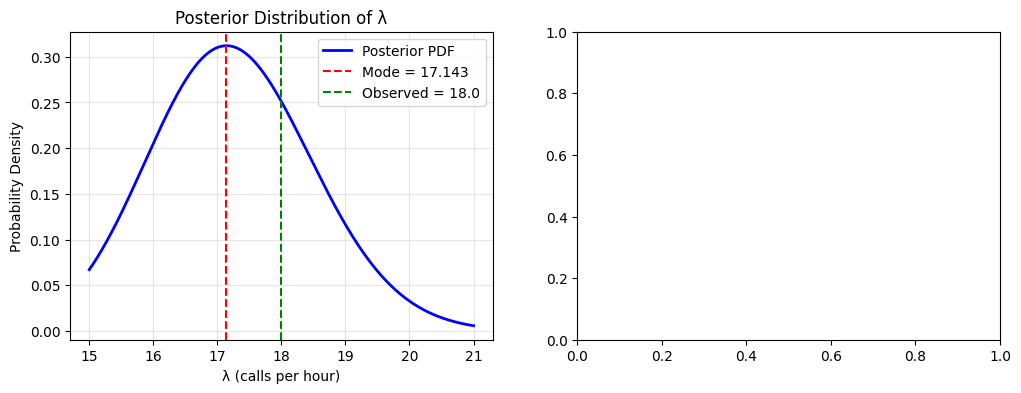

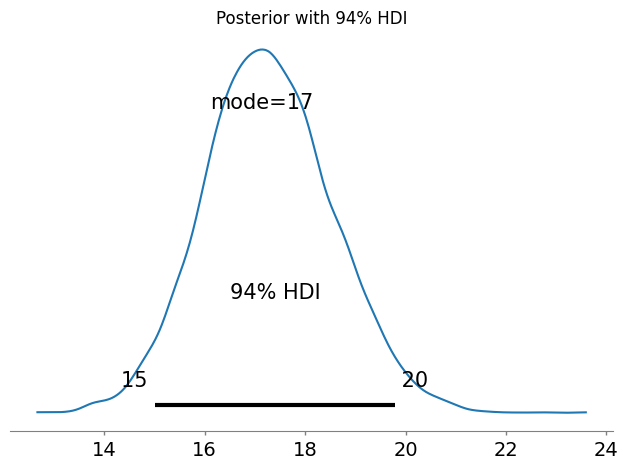

In [9]:
plt.figure(figsize=(12, 4))

# Posteriori Distribution
plt.subplot(1, 2, 1)
x = np.linspace(15, 21, 1000)
pdf = stats.gamma.pdf(x, alpha_post, scale=1/beta_post)
plt.plot(x, pdf, 'b-', linewidth=2, label='Posterior PDF')
plt.axvline(posteriori_mode, color='r', linestyle='--', label=f'Mode = {posteriori_mode:.3f}')
plt.axvline(observed_average, color='g', linestyle='--', label=f'Observed = {observed_average:.1f}')
plt.xlabel('λ (calls per hour)')
plt.ylabel('Probability Density')
plt.title('Posterior Distribution of λ')
plt.legend()
plt.grid(True, alpha=0.3)

# HDI visualization

plt.subplot(1, 2, 2)
az.plot_posterior(posteriori_samples, hdi_prob=0.94, point_estimate='mode')
plt.title('Posterior with 94% HDI')

plt.tight_layout()
plt.show()